In [88]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

# Predicting the weight of ROUSes using Linear Regression
Using other data we have in the table, we want to predict the weight of ROUSes.

In [145]:
rouses = pd.read_csv('../data/ROUSes.csv')
print(rouses.shape)
rouses.head()

(29, 4)


,Age,Length,Weight,Temperament
0,9.5,4.1,93.2,Sleepy
1,12.0,4.1,97.7,Moody
2,14.5,4.6,120.3,No-nonsense
3,7.0,3.3,60.4,Moody
4,10.0,3.5,75.3,No-nonsense


# Exploratory analysis
First, let's look at some scatterplots of the numberic variables vs. weight.

<Axes: xlabel='Age', ylabel='Weight'>

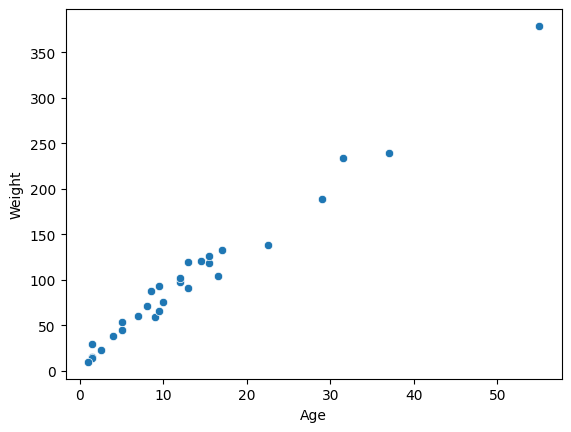

In [146]:
sns.scatterplot(data=rouses, x='Age',y='Weight')

<Axes: xlabel='Length', ylabel='Weight'>

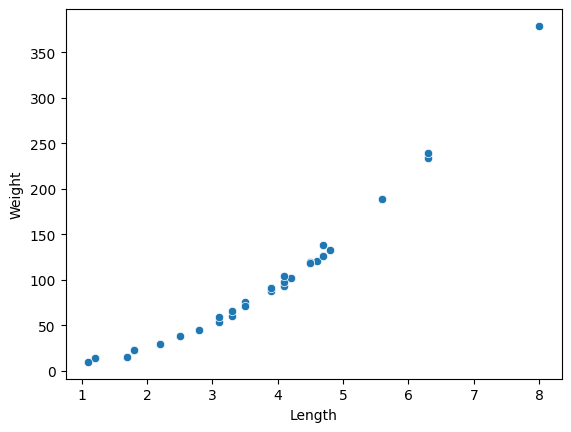

In [147]:
sns.scatterplot(data=rouses, x='Length',y='Weight')

Age seems to have a decently linear correlation with weight.  Lenght looks more like a square relationship.  So we'll try using Age to predict Weight.  Let's drop the other columns.

In [148]:
rouses = rouses.drop(columns=['Temperament','Length']) # drop the column 'Name'
rouses.head()

,Age,Weight
0,9.5,93.2
1,12.0,97.7
2,14.5,120.3
3,7.0,60.4
4,10.0,75.3


Just as with Decision Trees, we will **randomly split the sample into two groups, and reserve the samples in the test set for evaluating the model**. 

Think of it as a professor reserving some questions in the question bank for the actual test (test) and releasing the rest as practice questions (train). Why would giving all the questions ahead of time be an inaccurate way to evaluate a student's understanding (model)?

In [149]:
train = rouses.sample(frac=0.8) # 80% rows for training
test = rouses.drop(index=train.index) # rest of rows for testing
print(train.shape, test.shape)

(23, 2) (6, 2)


The next thing to do is to separate out the target data `Weight` from the predictor data (everything else; in this case just Age is left).

In [150]:
y_train = train['Weight']
X_train = train.drop(columns=['Weight'])
print(X_train.shape, y_train.shape)

y_test = test['Weight']
X_test = test.drop(columns=['Weight']) 
print(X_test.shape, y_test.shape)

(23, 1) (23,)
(6, 1) (6,)


## Training or fitting a model 

To use a machine learning model from `scikit-learn`, you should import the relevant model.

In [152]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
print('Train score:',lr.score(X_train, y_train))
print('Test score:',lr.score(X_test, y_test))

coefs = pd.DataFrame(lr.coef_, 
                     index=lr.feature_names_in_, 
                    columns=['Coefficient vals'])
coefs



Train score: 0.9772859511968092
Test score: 0.9766773006394002


,Coefficient vals
Age,6.559053


For linear regression a "score" (the R2 value) near 1 is what we are hoping for, and 0 is the worst result.  So our model is doing a very good job at predicting the data!  The coefficient tells us how much Weight change to expect with every unit change of Age.

To visualize our line, we can plug some values in and have their outputs predicted:

In [155]:
predict_inputs = pd.DataFrame({'Age':[1,55]})
predictions=lr.predict(predict_inputs)
predictions

array([ 20.22224156, 374.41112462])

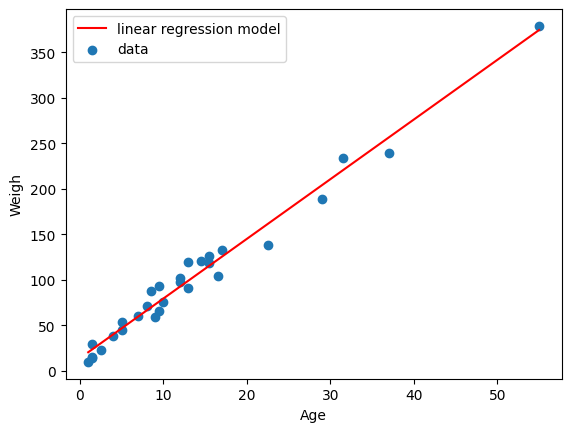

In [157]:
fig, ax = plt.subplots(1)

ax.plot([1,55], [predictions[0], predictions[1]], color = "red", label = "linear regression model")
ax.scatter(rouses['Age'], rouses['Weight'], label = "data")
ax.set(xlabel='Age', ylabel='Weight')
plt.legend()

Indeed, it looks like this line is a very good fit to our data!

# Another example
Here is another linear regression example for synthetically generated data that we actually know the **true** model

In [158]:
# controls random number generation
# always get the same data
np.random.seed(1234) 

# true model is linear with a = 1 and b = 1
a = 1
b = 1

n_points = 100

X = np.random.rand(n_points)
Y = a*X + b + 0.2*np.random.randn(n_points) # final term is random noise

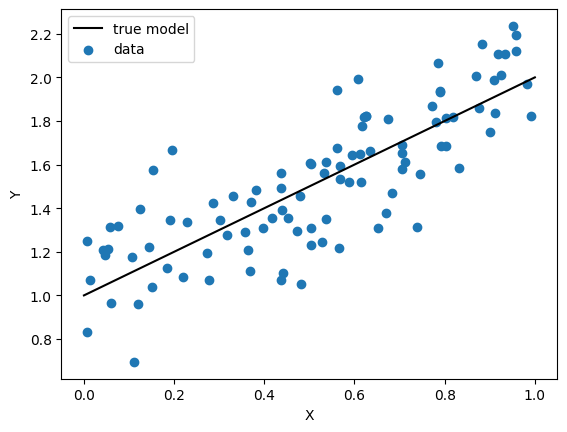

In [159]:
fig, ax = plt.subplots(1)

ax.plot([0,1], [1, 2], color = "black", label = "true model")
ax.scatter(X, Y, label = "data")
ax.set(xlabel='X', ylabel='Y')
plt.legend()

In [160]:
df = pd.DataFrame(data={'Y': Y, 'X': X})
train = df.sample(frac=0.8) # 80% rows for training
test = df.drop(index=train.index) # rest of rows for testing
print(train.shape, test.shape)
df


(80, 2) (20, 2)


,Y,X
0,1.344993,0.191519
1,1.819093,0.622109
2,1.491895,0.437728
3,2.063756,0.785359
4,1.795944,0.779976
...,...,...
95,1.233053,0.502560
96,1.609591,0.536878
97,1.816252,0.819202
98,1.311595,0.057116


In [121]:
y_train = train['Y']
X_train = train.drop(columns=['Y'])
print(X_train.shape, y_train.shape)

y_test = test['Y']
X_test = test.drop(columns=['Y']) 
print(X_test.shape, y_test.shape)

(80, 1) (80,)
(20, 1) (20,)


In [122]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)



LinearRegression()

In [123]:
lr.score(X_train, y_train) 
# R2 value for our training data 

0.6723254715066839

In [124]:
lr.score(X_test, y_test) 
# R2 value for our training data 

0.5889557948733519

In [125]:
coefs = pd.DataFrame(lr.coef_, 
                     index=lr.feature_names_in_, 
                    columns=['Coefficient vals'])
coefs



,Coefficient vals
X,0.991716


In [126]:
prediction_inputs = pd.DataFrame(data={'X': [0,1]})
predictions = lr.predict(prediction_inputs)
predictions

array([0.98687831, 1.9785944 ])

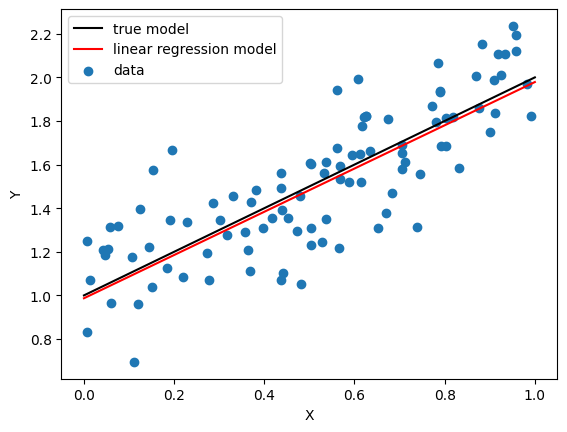

In [127]:
fig, ax = plt.subplots(1)

ax.plot([0,1], [1, 2], color = "black", label = "true model")
ax.plot([0,1], [predictions[0], predictions[1]], color = "red", label = "linear regression model")
ax.scatter(X, Y, label = "data")
ax.set(xlabel='X', ylabel='Y')
plt.legend()